In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits 


### Open the FITS file 

In [2]:
fname = "HorseHead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


##### Generally the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu_list

In [3]:
image_data = hdu_list[0].data 

##### Our data is now stored as a 2-D numpy array. But how do we know the dimensions of the image? we ca simply look at the shape of the array. 

In [4]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


##### At this point, we can close the FITS file because we've stored everything we wanted to a variable

In [5]:
hdu_list.close()

##### Shortcut: use "getdata()" to just read in the image data and close the file.


In [6]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)


<class 'numpy.ndarray'>
(893, 891)


##### Let's show the data 

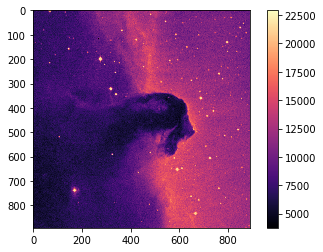

In [7]:
plt.imshow(image_data, cmap='magma')
plt.colorbar()

##### Let's get some basic stats about our image 

In [8]:
print("Min:", np.min(image_data))
print("Max:", np.max(image_data))
print("Mean:", np.mean(image_data))
print("Stdev:", np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


### Plotting a histogram
To make a histogram with matplotlib.pyplot.hist(), we'll need to cast the data from a 2-D array to something one dimensional. 
In this case, let's use the ndarray.flatten() to return a 1-D numpy array 

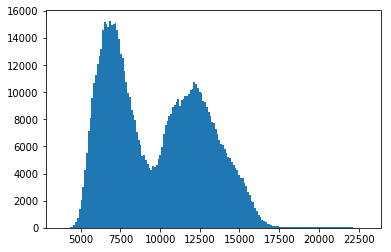

In [9]:
histogram = plt.hist(image_data.flatten(), bins = 'auto')

### Displaying the image with a logarithmic scale 
What is we want to use a logarithmic color scale? To do so, we can load the LogNorm object from matplotlib. 
using a logarithmic scale can help see the fainter details more 

In [10]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

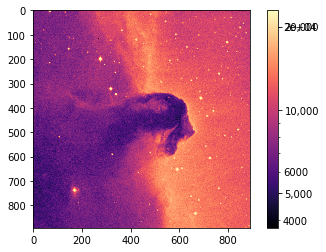

In [11]:
plt.imshow(image_data, cmap='magma', norm = LogNorm())

#choose the tick marks based on the histogram above
cbar = plt.colorbar(ticks = [5.e3, 1.e4, 2.e4])
cbar.ax.set_yticklabels(['5,000', '10,000', '20,000'])

### Stacking images 

Since the noise in an image results from a random process, we use stacking of separate images to improve the signal to noise ratio of objects we observe. Here we are going to stack 5 images of M13 taken with a 10 inch telescope.

In [12]:
#make a list of file names 
image_list = ['M13_blue_0001.fits', 'M13_blue_0002.fits', 'M13_blue_0003.fits',\
             'M13_blue_0004.fits', 'M13_blue_0005.fits']

In [13]:
print(image_list)

['M13_blue_0001.fits', 'M13_blue_0002.fits', 'M13_blue_0003.fits', 'M13_blue_0004.fits', 'M13_blue_0005.fits']


In [14]:
#make an array of images from the list of images 
image_concat = [fits.getdata(image) for image in image_list]
#one for each element, get image data, will make a list of images 

In [15]:
#sum the images together 
final_image = np.sum(image_concat, axis=0)

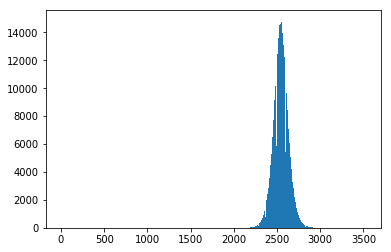

In [16]:
#plot a histogram of the image pixel values 
image_hist = plt.hist(final_image.flatten(), bins='auto')

(0, 3500)

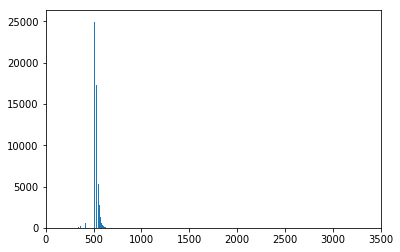

In [18]:
image_hist = plt.hist(image_concat[0].flatten(), bins='auto')
plt.xlim([0,3500])

In [19]:
#noise and signal increase, but signal increases faster, 
#this is why we stack images byt sqrt of # of images stacked 

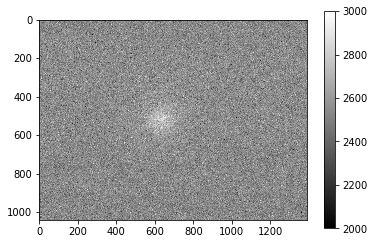

In [23]:
plt.imshow(final_image, cmap='gray', vmin=2e3, vmax=3e3)
plt.colorbar()

### Writing a new FITS file 
We can easily do this with the writeo() method. 

Warning: You'll receive an error if the file you are trying to write already exists, That's why we've set the clobber = True 

In [24]:
outfile = "stacked_M13_blue.fits"
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)

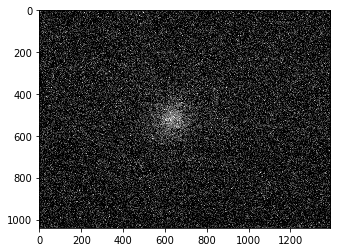

In [25]:
hdu_list = fits.open(outfile)
header = hdu_list[0].header
data = hdu_list[0].data
plt.imshow(data,cmap='gray', vmin=2.5e3, vmax=3e3)

In [26]:
print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                   64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1392                                                  NAXIS2  =                 1040                                                  EXTEND  =                    T                                                  BSCALE  =                    1                                                  BZERO   =  9223372036854775808                                                  END                                                                                                                                                                                                                                                                                                                                                                     